<a href="https://colab.research.google.com/github/moiyajosephs/Daat-622/blob/main/Data_622_Homework_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 3
# Moiya Josephs


In [197]:
import pandas
import numpy as np

import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

df = pandas.read_csv("student_sleep_patterns.csv")

df.head()

,Student_ID,Age,Gender,University_Year,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End
0,1,24,Other,2nd Year,7.7,7.9,3.4,2,37,10,14.16,4.05,7.41,7.06
1,2,21,Male,1st Year,6.3,6.0,1.9,5,74,2,8.73,7.10,8.21,10.21
2,3,22,Male,4th Year,5.1,6.7,3.9,5,53,5,20.00,20.47,6.88,10.92
3,4,24,Other,4th Year,6.3,8.6,2.8,4,55,9,19.82,4.08,6.69,9.42
4,5,20,Male,4th Year,4.7,2.7,2.7,0,85,3,20.98,6.12,8.98,9.01


In [202]:
from statsmodels.api import qqplot

Below shows the distirbution of our target variable (sleep distribution)

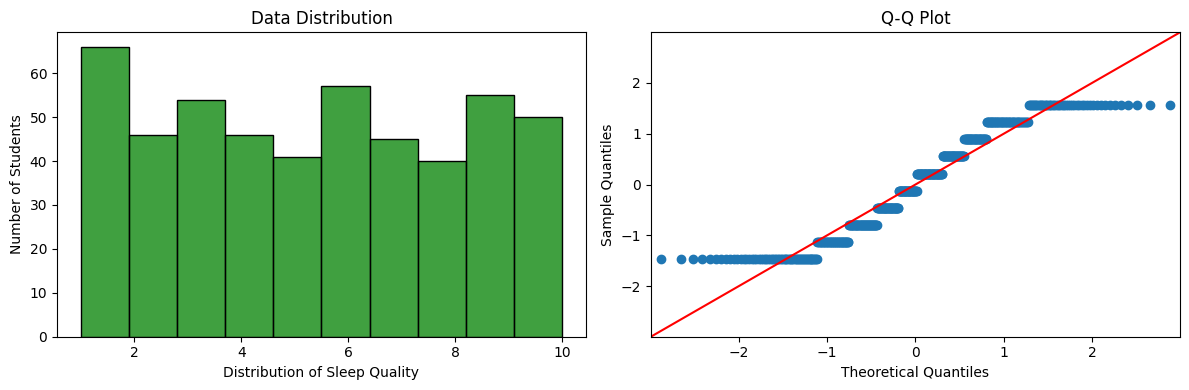

In [241]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Histogram
axs[0].set_title("Data Distribution")
sns.histplot(df['Sleep_Quality'], color='green', ax=axs[0])
axs[0].set_xlabel("Distribution of Sleep Quality")
axs[0].set_ylabel("Number of Students")

# Q-Q Plot
axs[1].set_title("Q-Q Plot")

qq_ax = fig.add_subplot(axs[1])  # Assign the second subplot explicitly to Q-Q plot
qqplot(df['Sleep_Quality'], line='45', ax=qq_ax, fit=True)

plt.tight_layout()
plt.show()

It shows a non normal disttribution and a slighlty larger population in a sleep quality of 0.

Next, I will show the distribution of study hours.

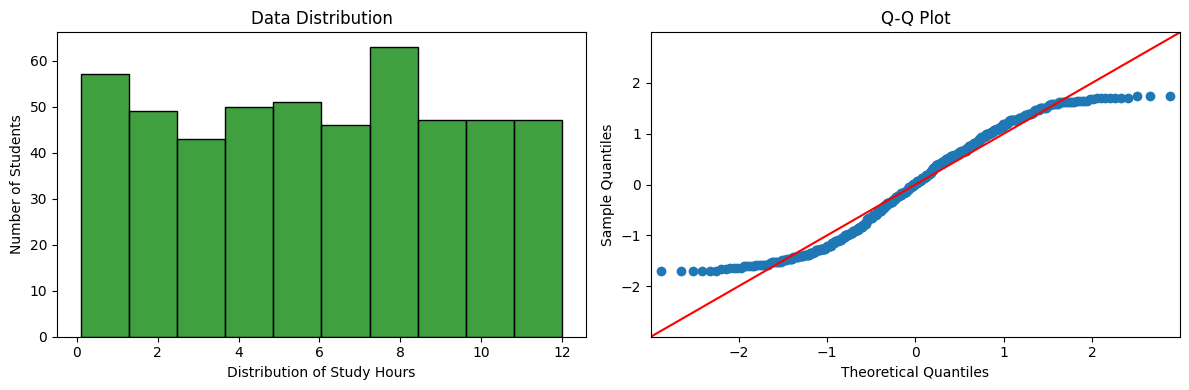

In [242]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Histogram
axs[0].set_title("Data Distribution")
sns.histplot(df['Study_Hours'], color='green', ax=axs[0])
axs[0].set_xlabel("Distribution of Study Hours")
axs[0].set_ylabel("Number of Students")

# Q-Q Plot
axs[1].set_title("Q-Q Plot")

# Use fig.add_subplot to control where the Q-Q plot appears
qq_ax = fig.add_subplot(axs[1])  # Assign the second subplot explicitly to Q-Q plot
qqplot(df['Study_Hours'], line='45', ax=qq_ax, fit=True)

plt.tight_layout()
plt.show()

The study hours shows a more normal distribution according to the QQ plot.

## Decision Trees from Previous Assignment


Now I will predict the taget vairable using the decision trees from my last assignment.

Preivously, I was unable to achieve a high accuracy utilizing decision trees.

In [204]:
gender_map = {'Male': 0, 'Female': 1, 'Other': 2}
df['Gender'] = df['Gender'].map(gender_map)

university_map = {'1st Year': 0, '2nd Year': 1, '3rd Year': 2, '4th Year': 3}
df['University_Year'] = df['University_Year'].map(university_map)




In [205]:
features = df.columns.tolist()
# Remove unique identifiers
features.remove('Student_ID')
# Remove dependent variable
features.remove('Sleep_Quality')



In [206]:
X = df[features]
y = df['Sleep_Quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [207]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

### Decision Tree 1

In [208]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)

In [210]:
# Predicting
y_pred = dtree.predict(X_test)

# Evaluating variance
Variance = np.var(y_pred)

# Evaluating SSE
SSE = np.mean((np.mean(y_pred) - y_test)** 2)
# Evaluating Variance
Bias = SSE - Variance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Variance:", Variance)
print("SSE:", SSE)
print("Bias:", Bias)

Accuracy: 0.16
Variance: 7.87128888888889
SSE: 8.947999999999999
Bias: 1.0767111111111083


In [211]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[3 1 1 1 5 1 5 3 0 0]
 [3 1 2 1 0 2 1 0 5 1]
 [0 1 3 3 1 1 3 1 1 2]
 [1 3 0 4 0 0 1 0 1 2]
 [1 1 2 0 2 1 2 1 2 0]
 [2 0 0 2 3 5 2 0 4 2]
 [1 0 1 2 1 0 3 0 0 1]
 [3 2 2 0 0 3 1 1 2 1]
 [1 2 2 0 3 2 2 0 1 1]
 [3 1 0 1 3 1 2 1 3 1]]
              precision    recall  f1-score   support

           1       0.17      0.15      0.16        20
           2       0.08      0.06      0.07        16
           3       0.23      0.19      0.21        16
           4       0.29      0.33      0.31        12
           5       0.11      0.17      0.13        12
           6       0.31      0.25      0.28        20
           7       0.14      0.33      0.19         9
           8       0.14      0.07      0.09        15
           9       0.05      0.07      0.06        14
          10       0.09      0.06      0.07        16

    accuracy                           0.16       150
   macro avg       0.16      0.17      0.16       150
weighted avg       0.17      0.16      0.16       150



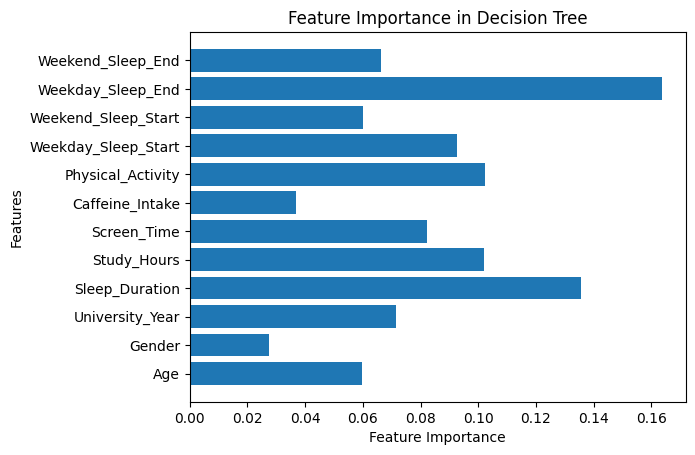

In [212]:
# Plotting feature importances
importances = dtree.feature_importances_
features = X_train.columns
plt.barh(features, importances)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Decision Tree")
plt.show()

### Decision Tree 2

In [213]:
features = df.columns.tolist()
# Remove unique identifiers
features.remove('Student_ID')
features.remove('Caffeine_Intake')
features.remove('Age')
features.remove('Gender')


# Remove dependent variable
features.remove('Sleep_Quality')
X = df[features]
y = df['Sleep_Quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)
# Predicting
y_pred = dtree.predict(X_test)

# Evaluating variance
Variance = np.var(pred)

# Evaluating SSE
SSE = np.mean((np.mean(y_pred) - y_test)** 2)
# Evaluating Variance
Bias = SSE - Variance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Variance:", Variance)
print("SSE:", SSE)
print("Bias:", Bias)

Accuracy: 0.09333333333333334
Variance: 0.2464
SSE: 8.983555555555556
Bias: 8.737155555555557


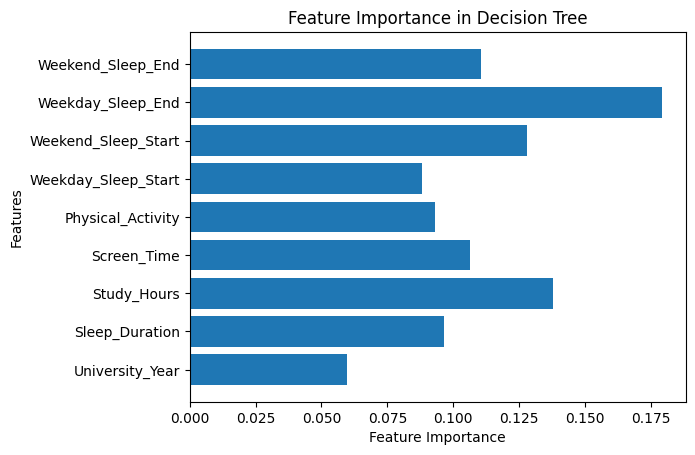

In [214]:
# Plotting feature importances
importances = dtree.feature_importances_
features = X_train.columns
plt.barh(features, importances)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Decision Tree")
plt.show()

In [216]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2 1 1 0 3 2 5 2 2 2]
 [5 0 2 1 0 1 0 0 5 2]
 [0 1 3 0 0 3 4 1 0 4]
 [1 3 0 1 2 0 1 0 3 1]
 [2 1 1 0 1 1 2 1 3 0]
 [4 0 3 1 2 4 0 1 3 2]
 [4 0 1 1 1 1 0 0 0 1]
 [2 0 2 1 1 4 0 1 3 1]
 [0 2 2 0 4 2 4 0 0 0]
 [1 1 1 2 4 2 1 1 1 2]]
              precision    recall  f1-score   support

           1       0.10      0.10      0.10        20
           2       0.00      0.00      0.00        16
           3       0.19      0.19      0.19        16
           4       0.14      0.08      0.11        12
           5       0.06      0.08      0.07        12
           6       0.20      0.20      0.20        20
           7       0.00      0.00      0.00         9
           8       0.14      0.07      0.09        15
           9       0.00      0.00      0.00        14
          10       0.13      0.12      0.13        16

    accuracy                           0.09       150
   macro avg       0.10      0.08      0.09       150
weighted avg       0.10      0.09      0.10       150



### Decision Tree 3

In [217]:
# Create and train a pruned Decision Tree with pre-pruning techniques
tree = DecisionTreeClassifier(max_depth=5, min_samples_split=2, min_samples_leaf=5, random_state=0)
tree.fit(X_train, y_train)

# Predict and evaluate
y_pred = tree.predict(X_test)
# Evaluating variance
Variance = np.var(y_pred)

# Evaluating SSE
SSE = np.mean((np.mean(y_pred) - y_test)** 2)
# Evaluating Variance
Bias = SSE - Variance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Variance:", Variance)
print("SSE:", SSE)
print("Bias:", Bias)

Accuracy: 0.14
Variance: 8.512222222222222
SSE: 11.245555555555553
Bias: 2.7333333333333307


In [218]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2 2 1 0 0 1 2 2 3 7]
 [0 1 3 1 0 0 0 1 7 3]
 [1 1 1 1 0 0 3 2 3 4]
 [1 1 0 1 0 0 2 3 3 1]
 [1 2 1 1 0 1 0 1 2 3]
 [2 0 1 2 1 3 3 2 4 2]
 [0 0 2 0 0 0 1 1 2 3]
 [0 2 1 0 0 4 2 3 2 1]
 [0 2 0 0 3 3 3 0 3 0]
 [2 1 0 0 1 0 2 2 2 6]]
              precision    recall  f1-score   support

           1       0.22      0.10      0.14        20
           2       0.08      0.06      0.07        16
           3       0.10      0.06      0.08        16
           4       0.17      0.08      0.11        12
           5       0.00      0.00      0.00        12
           6       0.25      0.15      0.19        20
           7       0.06      0.11      0.07         9
           8       0.18      0.20      0.19        15
           9       0.10      0.21      0.13        14
          10       0.20      0.38      0.26        16

    accuracy                           0.14       150
   macro avg       0.14      0.14      0.12       150
weighted avg       0.15      0.14      0.13       150



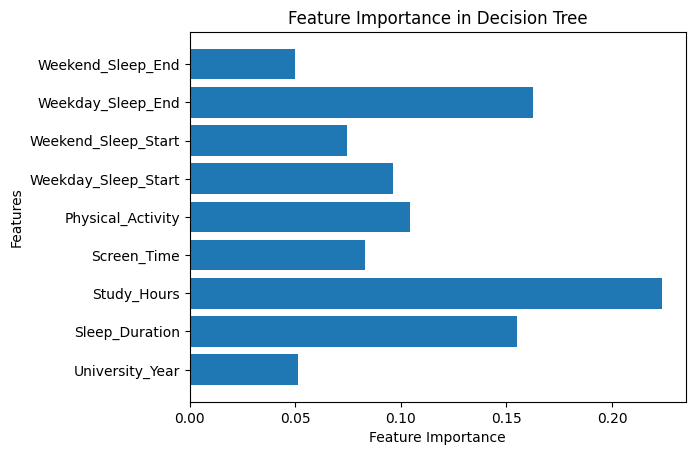

In [219]:
# Plotting feature importances
importances = tree.feature_importances_
features = X_train.columns
plt.barh(features, importances)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Decision Tree")
plt.show()

Each decision tree showed low accuracy results and were not able to properly classify the data.

## SVM


In [220]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [221]:
# Standardize the features
features = df.columns.tolist()
# Remove unique identifiers
features.remove('Student_ID')
# Remove dependent variable
features.remove('Sleep_Quality')

X = df[features]
y = df['Sleep_Quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [222]:
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.decomposition import PCA

### SVM 1

In [223]:
# Create and train the SVM model
svm_model = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)

svm_model.fit(X_train, y_train)
# Make predictions
y_pred = svm_model.predict(X_test)

# Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 8  0  1  1  1  0  3  0  5  1]
 [ 3  0  2  0  0  3  1  1  6  0]
 [ 8  1  1  0  0  5  0  0  1  0]
 [ 4  1  0  0  1  0  1  0  3  2]
 [ 5  0  0  0  0  1  2  0  4  0]
 [ 7  3  2  0  1  2  2  0  2  1]
 [ 2  1  0  2  0  0  0  0  4  0]
 [ 6  2  0  0  0  2  2  0  3  0]
 [ 4  3  1  0  0  1  3  0  1  1]
 [10  0  0  0  0  1  1  0  4  0]]
              precision    recall  f1-score   support

           1       0.14      0.40      0.21        20
           2       0.00      0.00      0.00        16
           3       0.14      0.06      0.09        16
           4       0.00      0.00      0.00        12
           5       0.00      0.00      0.00        12
           6       0.13      0.10      0.11        20
           7       0.00      0.00      0.00         9
           8       0.00      0.00      0.00        15
           9       0.03      0.07      0.04        14
          10       0.00      0.00      0.00        16

    accuracy                           0.08       150
   macro avg       

In [224]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf', 'poly']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=5)
grid.fit(X_train, y_train)

print(grid.best_params_)
best_model = grid.best_estimator_

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1

### SVM 2


In [225]:
# Create and train the SVM model
svm_model2 = SVC(kernel='rbf', C=0.1, gamma=1, random_state=42)
svm_model2.fit(X_train, y_train)

# Make predictions
y_pred = svm_model2.predict(X_test)

In [226]:
# Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[20  0  0  0  0  0  0  0  0  0]
 [16  0  0  0  0  0  0  0  0  0]
 [16  0  0  0  0  0  0  0  0  0]
 [12  0  0  0  0  0  0  0  0  0]
 [12  0  0  0  0  0  0  0  0  0]
 [20  0  0  0  0  0  0  0  0  0]
 [ 9  0  0  0  0  0  0  0  0  0]
 [15  0  0  0  0  0  0  0  0  0]
 [14  0  0  0  0  0  0  0  0  0]
 [16  0  0  0  0  0  0  0  0  0]]
              precision    recall  f1-score   support

           1       0.13      1.00      0.24        20
           2       0.00      0.00      0.00        16
           3       0.00      0.00      0.00        16
           4       0.00      0.00      0.00        12
           5       0.00      0.00      0.00        12
           6       0.00      0.00      0.00        20
           7       0.00      0.00      0.00         9
           8       0.00      0.00      0.00        15
           9       0.00      0.00      0.00        14
          10       0.00      0.00      0.00        16

    accuracy                           0.13       150
   macro avg       

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### Observations:

The overall accuracy is 9%, indicating poor performance.

Some labels have non-zero precision or recall, but many are unclassified (e.g., precision=0 for most classes). There is an imbalance in the target variable which is leading to poor model generalization.

**Precision:** The proportion of true positive predictions out of all predictions for that class. A value of 0.00 means the model predicted none of the instances for that class correctly.

**Recall:** The proportion of true positive predictions out of all actual instances of the class. A value of 0.00 indicates the model failed to identify any true instances for that class.

**F1-Score:** The harmonic mean of precision and recall. A value of 0.00 means no balance between precision and recall due to zero values in both metrics.

**Support:** The total number of true instances of each class in the dataset.

Key Observations:
**Class 1:**
Precision = 0.13, Recall = 1.00, F1-Score = 0.24.

This class is overpredicted. The model predicted every instance for Class 1 correctly (high recall), but many incorrect predictions for other classes were also labeled as Class 1 (low precision).

Support = 20 indicates that there were 20 actual instances of Class 1.


**Other Classes (2-10):** All metrics (Precision, Recall, F1-Score) are 0.00 for Classes 2 to 10.
This means the model did not correctly predict any instances for these classes.
Support values vary between 9 and 20, meaning these classes are present in the dataset but not recognized by the model.

The model is heavily biased towards predicting Class 1, ignoring all other classes (Classes 2-10). This is a significant imbalance in classification performance.

I will try to remove features that may not be contributing to the algorithm.



### SVM 3

In [240]:
features = df.columns.tolist()
# Remove unique identifiers
features.remove('Student_ID')
features.remove('Caffeine_Intake')
features.remove('Age')
features.remove('Gender')


# Remove dependent variable
features.remove('Sleep_Quality')
X = df[features]
y = df['Sleep_Quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the SVM model
svm_model3 = SVC(kernel='rbf', C=0.1, gamma=1, random_state=42)
svm_model3.fit(X_train, y_train)

# Make predictions
y_pred = svm_model3.predict(X_test)

# Evaluating variance
Variance = np.var(y_pred)

# Evaluating SSE
SSE = np.mean((np.mean(y_pred) - y_test)** 2)
# Evaluating Variance
Bias = SSE - Variance

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Variance:", Variance)
print("SSE:", SSE)
print("Bias:", Bias)

Accuracy: 0.13333333333333333
Variance: 0.0
SSE: 27.54
Bias: 27.54


In [239]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 0 20  0  0  0  0  0  0  0  0]
 [ 0 16  0  0  0  0  0  0  0  0]
 [ 0 16  0  0  0  0  0  0  0  0]
 [ 0 12  0  0  0  0  0  0  0  0]
 [ 0 12  0  0  0  0  0  0  0  0]
 [ 0 20  0  0  0  0  0  0  0  0]
 [ 0  9  0  0  0  0  0  0  0  0]
 [ 0 15  0  0  0  0  0  0  0  0]
 [ 0 14  0  0  0  0  0  0  0  0]
 [ 0 16  0  0  0  0  0  0  0  0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        20
           2       0.11      1.00      0.19        16
           3       0.00      0.00      0.00        16
           4       0.00      0.00      0.00        12
           5       0.00      0.00      0.00        12
           6       0.00      0.00      0.00        20
           7       0.00      0.00      0.00         9
           8       0.00      0.00      0.00        15
           9       0.00      0.00      0.00        14
          10       0.00      0.00      0.00        16

    accuracy                           0.11       150
   macro avg       

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Again I obtain the same results as before with a model that is unable to predict the different classes.

### SVM 4

Another attempt at predicting the target variable is reducing the complexity by modifying the target vairable to a binary distribution. Where I change any rating over 5 as a "good" sleep quality and anything under as "bad".

In [231]:
binary_sleep_quality = df['Sleep_Quality'].apply(lambda x: 1 if x >= 5 else 0)


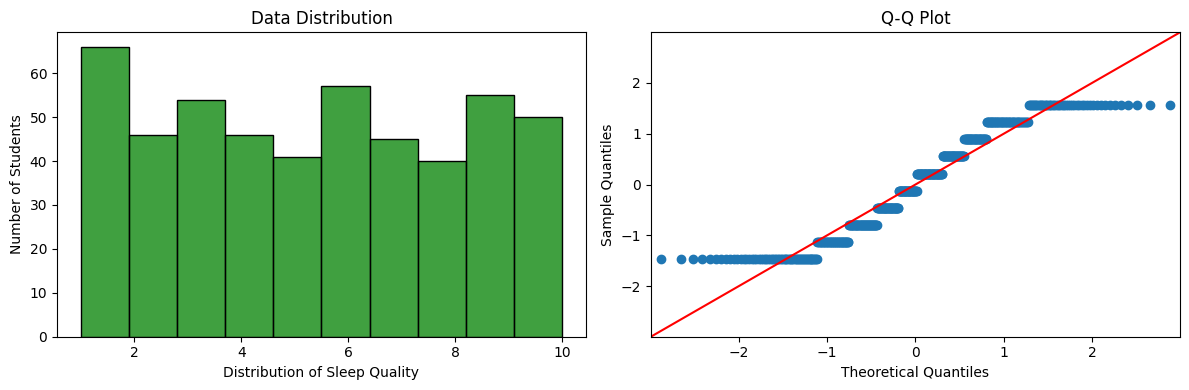

In [232]:

fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Histogram
axs[0].set_title("Data Distribution")
sns.histplot(df['Sleep_Quality'], color='green', ax=axs[0])
axs[0].set_xlabel("Distribution of Sleep Quality")
axs[0].set_ylabel("Number of Students")

# Q-Q Plot
axs[1].set_title("Q-Q Plot")

# Use fig.add_subplot to control where the Q-Q plot appears
qq_ax = fig.add_subplot(axs[1])  # Assign the second subplot explicitly to Q-Q plot
qqplot(df['Sleep_Quality'], line='45', ax=qq_ax, fit=True)

plt.tight_layout()
plt.show()

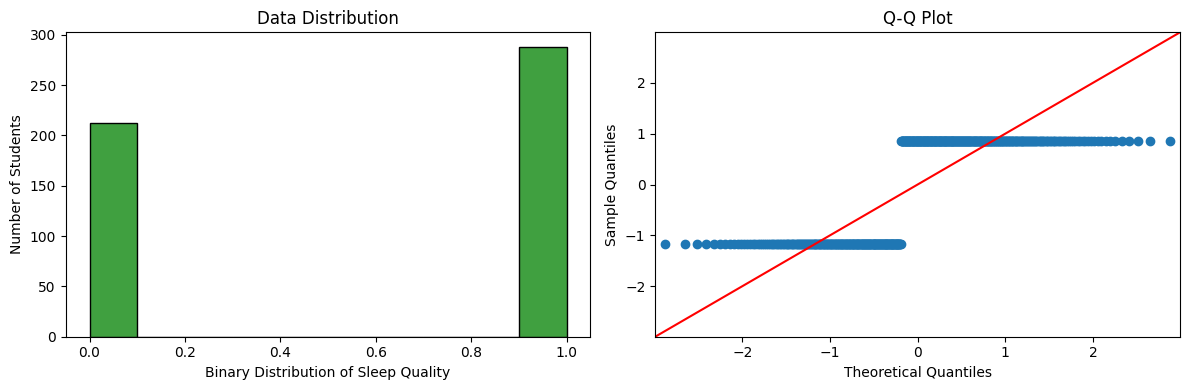

In [233]:

fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Histogram
axs[0].set_title("Data Distribution")
sns.histplot(binary_sleep_quality, color='green', ax=axs[0])
axs[0].set_xlabel("Binary Distribution of Sleep Quality")
axs[0].set_ylabel("Number of Students")

# Q-Q Plot
axs[1].set_title("Q-Q Plot")

# Use fig.add_subplot to control where the Q-Q plot appears
qq_ax = fig.add_subplot(axs[1])  # Assign the second subplot explicitly to Q-Q plot
qqplot(binary_sleep_quality, line='45', ax=qq_ax, fit=True)

plt.tight_layout()
plt.show()

In [234]:
features = df.columns.tolist()
# Remove unique identifiers
features.remove('Student_ID')

# Remove dependent variable
features.remove('Sleep_Quality')
X = df[features]
y = binary_sleep_quality

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the SVM model
svm_model4 = SVC(kernel='rbf', C=0.1, gamma=1, random_state=42)
svm_model4.fit(X_train, y_train)

# Make predictions
y_pred = svm_model4.predict(X_test)


print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 0 64]
 [ 0 86]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        64
           1       0.57      1.00      0.73        86

    accuracy                           0.57       150
   macro avg       0.29      0.50      0.36       150
weighted avg       0.33      0.57      0.42       150



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


The above output still shows a class Imbalance:

The model focuses entirely on class 1, ignoring class 0. This suggests the model is biased toward the majority or dominant class.

Perfect Recall for Class 1:

* While the model correctly identifies all instances of class 1, its precision for this class is only moderate (57%), indicating a significant number of false positives.

Failure for Class 0:

* The model doesn't predict any instances as class 0, leading to 0 precision, recall, and F1-score for this class.

The model is still not effective at handling both classes and suffers from class imbalance.
While it performs well for detecting class 1 (perfect recall), it completely neglects class 0, making it unsuitable if class 0 is important in the problem context.

To tackle this I used class_weight='balanced' in SVM to make the model more sensitive to underrepresented classes.

### SVM 5

In [235]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the SVM model
svm_model5 = SVC(kernel='rbf', C=0.1, gamma=1, random_state=42, class_weight='balanced')
svm_model5.fit(X_train, y_train)

# Make predictions
y_pred = svm_model5.predict(X_test)


print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[64  0]
 [86  0]]
              precision    recall  f1-score   support

           0       0.43      1.00      0.60        64
           1       0.00      0.00      0.00        86

    accuracy                           0.43       150
   macro avg       0.21      0.50      0.30       150
weighted avg       0.18      0.43      0.26       150



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Again, SVM is unable to properly balance the classes. The next option is to change the target variable to a binary output and compare the results to the decision tree.

#### Decision Tree with Binary Target

In [236]:
features = df.columns.tolist()
# Remove unique identifiers
features.remove('Student_ID')

# Remove dependent variable
features.remove('Sleep_Quality')
X = df[features]
y = binary_sleep_quality

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)
# Predicting
y_pred = dtree.predict(X_test)

# Evaluating variance
Variance = np.var(y_pred)

# Evaluating SSE
SSE = np.mean((np.mean(y_pred) - y_test)** 2)
# Evaluating Variance
Bias = SSE - Variance

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Variance:", Variance)
print("SSE:", SSE)
print("Bias:", Bias)


Accuracy: 0.5333333333333333
Variance: 0.2464
SSE: 0.2448
Bias: -0.001600000000000018


In [237]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[30 34]
 [36 50]]
              precision    recall  f1-score   support

           0       0.45      0.47      0.46        64
           1       0.60      0.58      0.59        86

    accuracy                           0.53       150
   macro avg       0.52      0.53      0.52       150
weighted avg       0.54      0.53      0.53       150



The decision tree is ultimately able to better classifiy the data when the target is modified to a binary distribution.

## Conclusion and Essay


### Results

| Model  | Accuracy |
|:-:|:-:|
| Decision Tree 1  | 16%  |
| Decision Tree 2 | 9%  |
| Decision Tree 3  | 14%  |
| Decision Tree 4 (Binary) |  53%   |
| SVM 1 | 8% |
| SVM 2 | 13% |
| SVM 3 | 13%  |
| SVM 4 |  57% |
| SVM 5 | 43% |


The three academic articles I utilized all had different findings when comparing SVM to Decision Trees. The first article was about Student Performance Prediction. The study used decision trees, SVMs, and k-nearest neighbors (KNN) to predict student performance. It found that decision trees slightly outperformed SVMs in terms of accuracy when the models were not tested, but SVMs had better performance after testing, particularly in predicting "active" students accurately. This highlights SVM's advantage in handling high-dimensional data and separating complex patterns effectively.

The second article focused on Chronic Kidney Disease Classification. This research compared decision trees, SVMs, and Naive Bayes for classifying chronic kidney disease using a dataset with 24 attributes and 400 samples. Again, SVMs were noted for their superior accuracy compared to decision trees, thanks to their robustness in handling non-linear boundaries using kernels. Decision trees, while interpretable, were less effective in capturing the complexity of the dataset.

The last artticle I read was on Heart Disease Prediction. In this study, decision trees (using the C4.5 algorithm) and SVMs were applied to heart disease data. Decision trees provided more transparent and interpretable results, which are crucial for medical applications. As with the other articles, SVMs offered better accuracy by maximizing the hyperplane margin. The study also highlighted SVM's ability to avoid overfitting through structured risk minimization principles.

These findings suggest that the choice between decision trees and SVMs depends on the context: decision trees are preferable for interpretability, while SVMs are better for accuracy in high-dimensional or complex datasets.

Based on the above academic papers, SVMs are recommended to get accurate results. When completing this assignment, I assumed I would obtain better results with SVM than with Decision Trees. While both models can be applied to regression problems, SVM is best suited for classification tasks. However the data is not complex enough for the SVM to be able to properly capture the data.

In the case of this assignment, SVM were not able to accomplish higher accuracy results than the Decision Trees. after utilizing GridSearch for optimal parameters. The increase in accuracy was not significant however.

In efforts to increase accruacy, I reduced the dimensionality of the data and tried to predict a binary outcome instead. When changing the target variable to a binary outcome, accuracy increased to 57%, however, the model showed class imbalance and therefore the results are not usable. Recommendation for fixing a target imbalance is Target Balancing. In future iterations it may be best to a pply oversampling (SMOTE) or undersampling to balance the classes.

I again used the new binary target against a decision tree which showed a 52% accruacy (larger than the preivous assignments decision tree accuracy which reached a maximum of 10% in comparison).

I agree with the recommendations of the articles. Since this data is not highly complex, the decision tree outperformed the SVM and obtained more useable results.

